In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('avocado.csv')

In [9]:
data.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [11]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
data.shape

(18249, 13)

# data preprocessing

In [13]:
print(data.isnull().sum())  #chwcks if there is any missing value

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [14]:
duplicates = data.duplicated()
print('no of duplicate rows:', duplicates.sum())

no of duplicate rows: 0


# Feature Engineering

In [15]:
#we are calculating average price for four weeks using the rolling() method

data['AvgPrice4Weeks'] = data['AveragePrice'].rolling(window=4).mean()
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AvgPrice4Weeks
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,NaN
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,NaN
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,NaN
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1.1725
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,1.1600


In [16]:
print(data.isnull().sum())  #gives the Null value for the first 3 rows

Date              0
AveragePrice      0
Total Volume      0
4046              0
4225              0
4770              0
Total Bags        0
Small Bags        0
Large Bags        0
XLarge Bags       0
type              0
year              0
region            0
AvgPrice4Weeks    3
dtype: int64


In [17]:
data = data.dropna()

In [18]:
data[:1]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AvgPrice4Weeks
3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.4,133.76,0.0,conventional,2015,Albany,1.1725


In [19]:
data[-2:-1]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AvgPrice4Weeks
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.0,0.0,organic,2018,WestTexNewMexico,1.785


In [20]:
data.shape

(18246, 14)

In [21]:
data.Date = pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18246 entries, 3 to 18248
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            18246 non-null  datetime64[ns]
 1   AveragePrice    18246 non-null  float64       
 2   Total Volume    18246 non-null  float64       
 3   4046            18246 non-null  float64       
 4   4225            18246 non-null  float64       
 5   4770            18246 non-null  float64       
 6   Total Bags      18246 non-null  float64       
 7   Small Bags      18246 non-null  float64       
 8   Large Bags      18246 non-null  float64       
 9   XLarge Bags     18246 non-null  float64       
 10  type            18246 non-null  object        
 11  year            18246 non-null  int64         
 12  region          18246 non-null  object        
 13  AvgPrice4Weeks  18246 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)

In [22]:
data = data.assign(order_month=data.Date.dt.month_name(),
                  order_week_of_the_year = data.Date.dt.weekofyear,
                  order_year = data.Date.dt.year)

data.head(5)

C:\Users\shwet\AppData\Local\Temp\ipykernel_17580\3727669025.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  order_week_of_the_year = data.Date.dt.weekofyear,


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AvgPrice4Weeks,order_month,order_week_of_the_year,order_year
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1.1725,December,49,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,1.1600,November,48,2015
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,1.1375,November,47,2015
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,1.1525,November,46,2015
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,1.1275,November,45,2015


In [23]:
def map_month_to_season(month_name):
    if month_name in ['March','April','May']:
        return 'Spring'
    elif month_name in ['June', 'July','August']:
        return 'Summer'
    elif month_name in ['September', 'October', 'November']:
        return 'Autumn'
    else:
        return 'Winter'
    
data['Season'] = data['order_month'].apply(map_month_to_season) 
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AvgPrice4Weeks,order_month,order_week_of_the_year,order_year,Season
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1.1725,December,49,2015,Winter
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,1.1600,November,48,2015,Autumn
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,1.1375,November,47,2015,Autumn
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,1.1525,November,46,2015,Autumn
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,1.1275,November,45,2015,Autumn


In [24]:
import copy
data1 = copy.deepcopy(data)

In [25]:
data1.drop(['Date', 'year'], axis=1, inplace=True)
data1.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,AvgPrice4Weeks,order_month,order_week_of_the_year,order_year,Season
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,1.1725,December,49,2015,Winter
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,1.1600,November,48,2015,Autumn
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,Albany,1.1375,November,47,2015,Autumn
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,Albany,1.1525,November,46,2015,Autumn
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,Albany,1.1275,November,45,2015,Autumn


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest , f_regression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import plotly.express as px



In [27]:
le = LabelEncoder()
data1['type_encoded'] = le.fit_transform(data1['type'])
data1.drop('type', axis=1, inplace=True)

In [28]:
data1[:5]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,AvgPrice4Weeks,order_month,order_week_of_the_year,order_year,Season,type_encoded
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany,1.1725,December,49,2015,Winter,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany,1.1600,November,48,2015,Autumn,0
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,Albany,1.1375,November,47,2015,Autumn,0
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,Albany,1.1525,November,46,2015,Autumn,0
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,Albany,1.1275,November,45,2015,Autumn,0


In [29]:
categorical = [var for var in data1.columns if data1[var].dtype=='object']
print('No of categorical features are', len(categorical))
if len(categorical)>=1:
    print('The categorical features are:', categorical)

No of categorical features are 3
The categorical features are: ['region', 'order_month', 'Season']


In [30]:
numerical = [var for var in data1.columns if data1[var].dtype!='object']
print('No of numerical features are:', len(numerical))
if len(categorical)>=1:
    print('The numerical features are:', numerical)

No of numerical features are: 13
The numerical features are: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'AvgPrice4Weeks', 'order_week_of_the_year', 'order_year', 'type_encoded']


In [31]:
data1[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18246.0,1.406012,4.026936e-01,0.44,1.1000,1.3700,1.6600,3.250000e+00
Total Volume,18246.0,850770.868112,3.453815e+06,84.56,10836.4650,107404.0000,433104.8050,6.250565e+07
4046,18246.0,293056.463528,1.265088e+06,0.00,854.6775,8652.6350,111046.1575,2.274362e+07
4225,18246.0,295191.684457,1.204216e+06,0.00,3008.0975,29055.7200,150247.5100,2.047057e+07
4770,18246.0,22843.478304,1.074725e+05,0.00,0.0000,185.0550,6244.0200,2.546439e+06
Total Bags,18246.0,239677.159411,9.863190e+05,0.00,5084.7100,39764.8150,110787.8250,1.937313e+07
Small Bags,18246.0,182223.215149,7.462365e+05,0.00,2847.9650,26377.8050,83337.8350,1.338459e+07
Large Bags,18246.0,54347.006285,2.439850e+05,0.00,128.0175,2649.2850,22036.0450,5.719097e+06
XLarge Bags,18246.0,3106.937265,1.769430e+04,0.00,0.0000,0.0000,133.0025,5.516937e+05
AvgPrice4Weeks,18246.0,1.405960,3.838410e-01,0.52,1.1075,1.3675,1.6575,3.075000e+00


# Visualisation

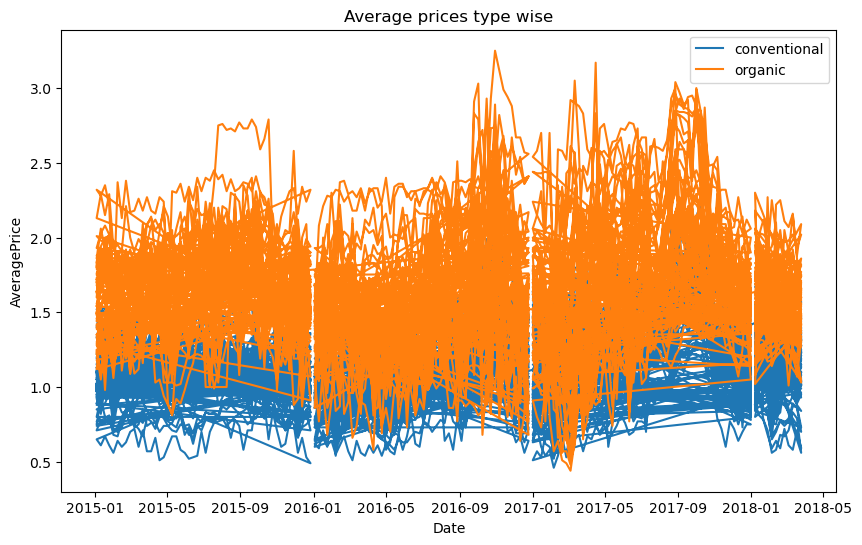

In [36]:
#Time series plot of average prices over time

plt.figure(figsize=(10,6))
plt.plot(data[data['type']=='conventional']['Date'], data[data['type']=='conventional']['AveragePrice'], label='conventional')
plt.plot(data[data['type']=='organic']['Date'], data[data['type']=='organic']['AveragePrice'], label='organic')

plt.xlabel('Date')
plt.ylabel('AveragePrice')
plt.legend()
plt.title('Average prices type wise')
plt.show()

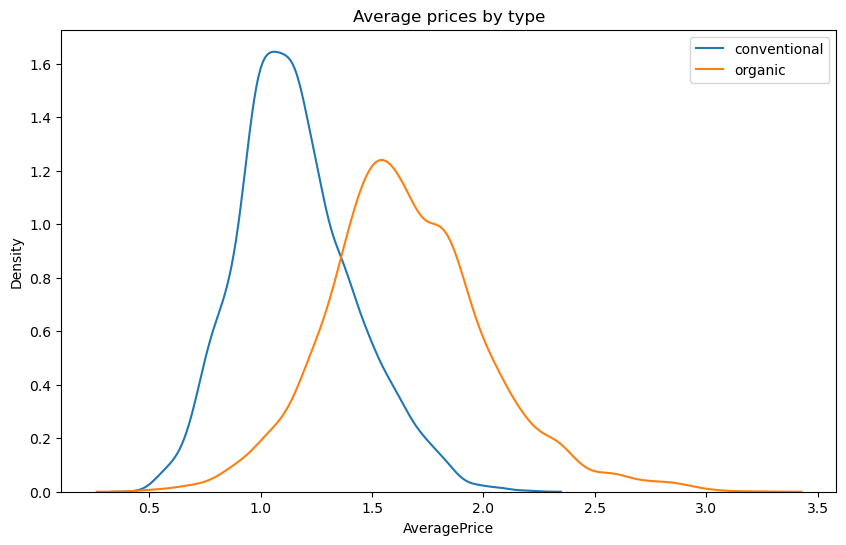

In [38]:
#Density plot of average price over time
plt.figure(figsize=(10,6))
sns.kdeplot(data[data['type']=='conventional']['AveragePrice'], label='conventional')
sns.kdeplot(data[data['type']=='organic']['AveragePrice'], label='organic')
plt.xlabel='AveragePrice'
plt.ylabel='Density'
plt.title('Average prices by type')
plt.legend()
plt.show()

In [43]:
#computing the average price for each avacado type

avg_price_conventional = data[data['type']=='conventional']['AveragePrice'].mean()
avg_price_organic = data[data['type']=='organic']['AveragePrice'].mean()

avg_price_df= pd.DataFrame({'Type': ['conventional', 'organic'], 'Avg_price': ['avg_price_conventional','avg_price_organic']})

fig = px.pie(avg_price_df, names='Type', values='Avg_price', hole=0.055, color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Average Avocado Price by Type')
fig.show()

In [56]:
unique = list(data['region'].unique())
len(unique)

54

TypeError: object of type 'generator' has no len()

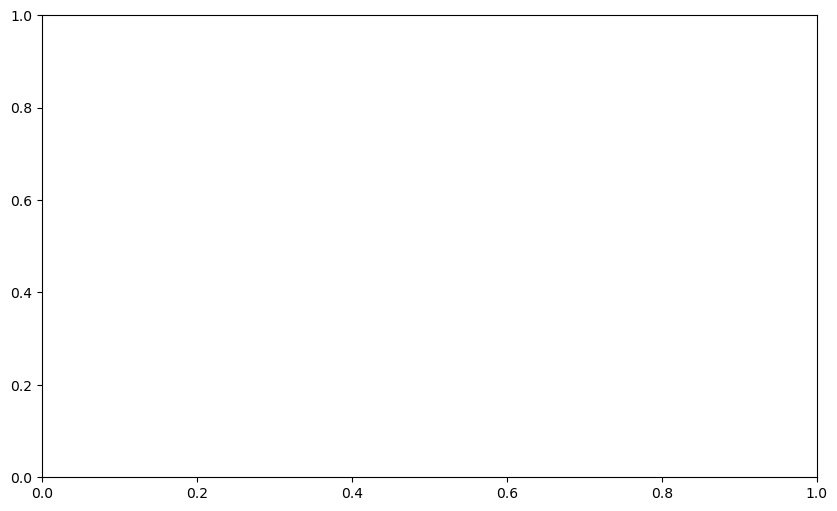

In [57]:
#box plot of average prices by region

plt.figure(figsize=(10,6))
plt.boxplot(data[data['region']==r]['AveragePrice'] for r in unique)
plt.xticks(range(1, len(unique)+1), unique,rotation=90)
plt.xlabel='Region'
plt.ylabel='Average Price'  
plt.title('Distribution of Average Avocado Prices by Region')
plt.show()                 